In [1]:
from Helper import Helper

In [2]:
h = Helper("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")

[]
2 -- 0 at 10_food_classes_10_percent
10 -- 0 at 10_food_classes_10_percent/train
0 -- 75 at 10_food_classes_10_percent/train/chicken_wings
0 -- 75 at 10_food_classes_10_percent/train/pizza
0 -- 75 at 10_food_classes_10_percent/train/fried_rice
0 -- 75 at 10_food_classes_10_percent/train/chicken_curry
0 -- 75 at 10_food_classes_10_percent/train/ice_cream
0 -- 75 at 10_food_classes_10_percent/train/hamburger
0 -- 75 at 10_food_classes_10_percent/train/ramen
0 -- 75 at 10_food_classes_10_percent/train/sushi
0 -- 75 at 10_food_classes_10_percent/train/grilled_salmon
0 -- 75 at 10_food_classes_10_percent/train/steak
10 -- 0 at 10_food_classes_10_percent/test
0 -- 250 at 10_food_classes_10_percent/test/chicken_wings
0 -- 250 at 10_food_classes_10_percent/test/pizza
0 -- 250 at 10_food_classes_10_percent/test/fried_rice
0 -- 250 at 10_food_classes_10_percent/test/chicken_curry
0 -- 250 at 10_food_classes_10_percent/test/ice_cream
0 -- 250 at 10_food_classes_10_percent/test/hamburger
0 -- 2

In [3]:
class_names = h.get_classnames()

In [4]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

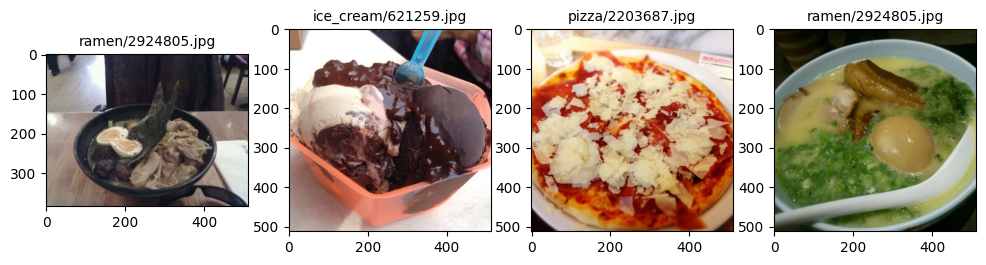

In [6]:
h.view_random_test_image()

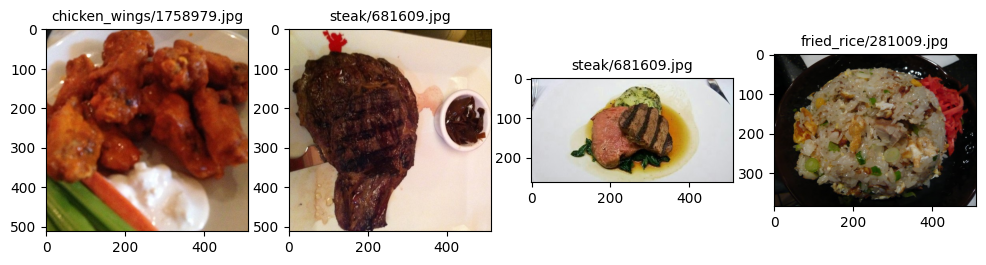

In [5]:
h.view_random_train_image()

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [14]:
# Importing the Data
def import_the_data(train_dir=None , test_dir=None):
  if train_dir is None  or test_data is None :
    train_dir = "10_food_classes_10_percent/train"
    test_dir =  "10_food_classes_10_percent/test"

  BATCH_SIZE = 32
  IMG_SIZE = (224,224)

  train_data = tf.keras.utils.image_dataset_from_directory(
      directory=train_dir,
      image_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=True,
      label_mode='categorical'

  )

  test_data = tf.keras.utils.image_dataset_from_directory(
      directory=test_dir,
      image_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      label_mode='categorical',
      shuffle=False
  )


In [15]:
import_the_data()

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [18]:
test_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [19]:
def create_callbacks(dir_name, exp_name):
  log_dir = dir_name + "/" + exp_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensor_callbacks = tf.keras.callbacks.TensorBoard(log_dir="./logs" )
  print(f"Dumping into the dir {log_dir}")
  return tensor_callbacks

## Setting Up a Model

In [22]:
tf.random.set_seed(42)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 0s 0us/step


In [36]:
for layer_no , layer_name in enumerate(base_model.layers[:-5]):
  if layer_name.trainable == True : layer_name.trainable =  False

In [38]:
for layer_no , layer_name in enumerate(base_model.layers[:]):
  if layer_name.trainable == True:
    print(layer_no ,layer_name.name , layer_name.trainable)


265 block6h_drop True
266 block6h_add True
267 top_conv True
268 top_bn True
269 top_activation True


In [64]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_Layer")


print("Shape of inputs  : ", inputs.shape)
## Add the input layer to base model



## Data Augmentation Layer

data_augmentaion_layer = Sequential(
    [
  layers.RandomFlip(mode='horizontal'),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.RandomRotation(0.2)
  ]
)

X = data_augmentaion_layer(inputs)

print("Shape after aug layer  : ", X.shape)

X = base_model(X, training=False)

print("Shape after passing through base model  : ", X.shape)

X = tf.keras.layers.GlobalAveragePooling2D(name="Global_Avg_Pool_Layer") ( X )

print("Shape after passing through Avg Pooling Layer  : ", X.shape)

outputs = tf.keras.layers.Dense(
    len(class_names),
    activation='softmax',
    name='Output_Layer'
) (X)

print("Shape after output layer : ", outputs.shape)

fine_tuned_model = tf.keras.Model(inputs , outputs)




Shape of inputs  :  (None, 224, 224, 3)
Shape after aug layer  :  (None, None, None, 3)
Shape after passing through base model  :  (None, None, None, 1280)
Shape after passing through Avg Pooling Layer  :  (None, 1280)
Shape after output layer :  (None, 10)


In [77]:
for layer_no , layer_name in enumerate(fine_tuned_model.layers):
  print(layer_no , layer_name.name , layer_name.trainable)
  if layer_name.name == "efficientnetv2-b0":
    for no , name in enumerate(layer_name.layers[-10:]):
      print('\t', 270 - 10 + no , name.name, name.trainable)

0 Input_Layer True
1 sequential_11 True
2 efficientnetv2-b0 True
	 260 block6h_se_reduce False
	 261 block6h_se_expand False
	 262 block6h_se_excite False
	 263 block6h_project_conv False
	 264 block6h_project_bn False
	 265 block6h_drop True
	 266 block6h_add True
	 267 top_conv True
	 268 top_bn True
	 269 top_activation True
3 Global_Avg_Pool_Layer True
4 Output_Layer True
